# EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datasets\Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Notice that there are only two classes low fat and regular. it just that there are different names for it array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object) 

In [6]:
# Simplifying the 'Item_Fat_Content' column by combining different representations into 'Low Fat' and 'Regular'
# We'll map all variations of 'Low Fat' to 'Low Fat' and all variations of 'Regular' to 'Regular'

# Mapping all variations of 'Low Fat' and 'Regular' to their respective categories
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Check the unique values after replacement
unique_fat_content_after = df['Item_Fat_Content'].unique()

# Verify the mapping and display the updated unique values
unique_fat_content_after


array(['Low Fat', 'Regular'], dtype=object)

In [7]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [8]:
len(df["Item_Type"].unique())

16

In [9]:
df["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [10]:
len(df["Outlet_Identifier"].unique())

10

In [11]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [13]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
# checking null values
null_values = df.isnull().sum()
null_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

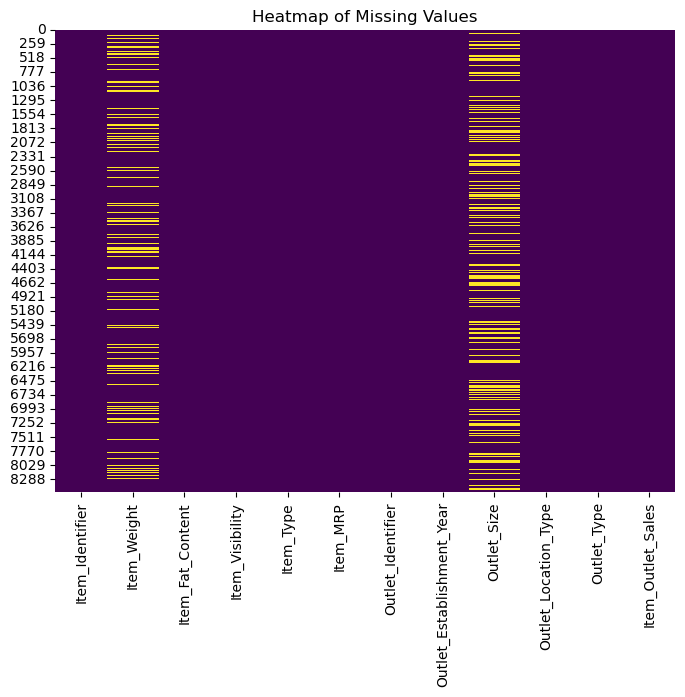

In [15]:
# Plotting missing values heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

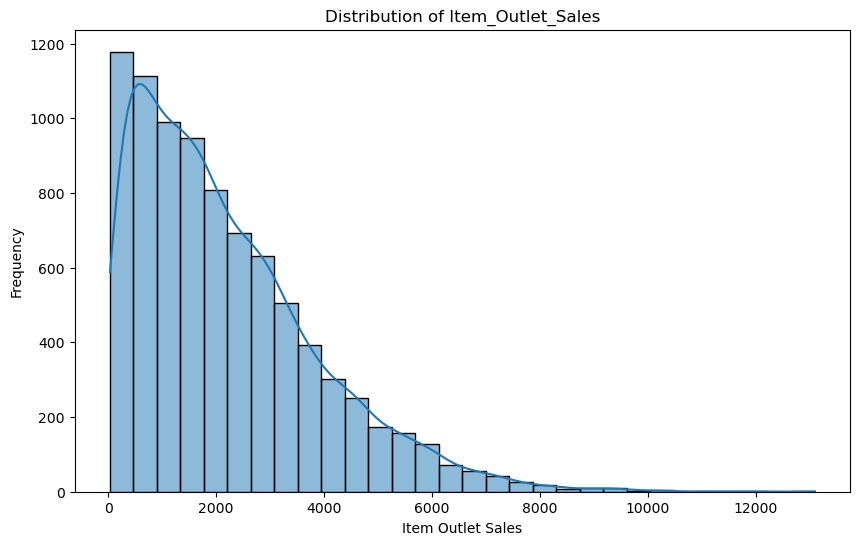

In [16]:
# Fill missing values for visualization (simple fill methods for now)
# We'll impute missing values in `Item_Weight` and `Outlet_Size`.
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)
df['Outlet_Size'].fillna('Medium', inplace=True)  # Filling 'Outlet_Size' with 'Medium', a common value

# Plotting distribution of the target variable: Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

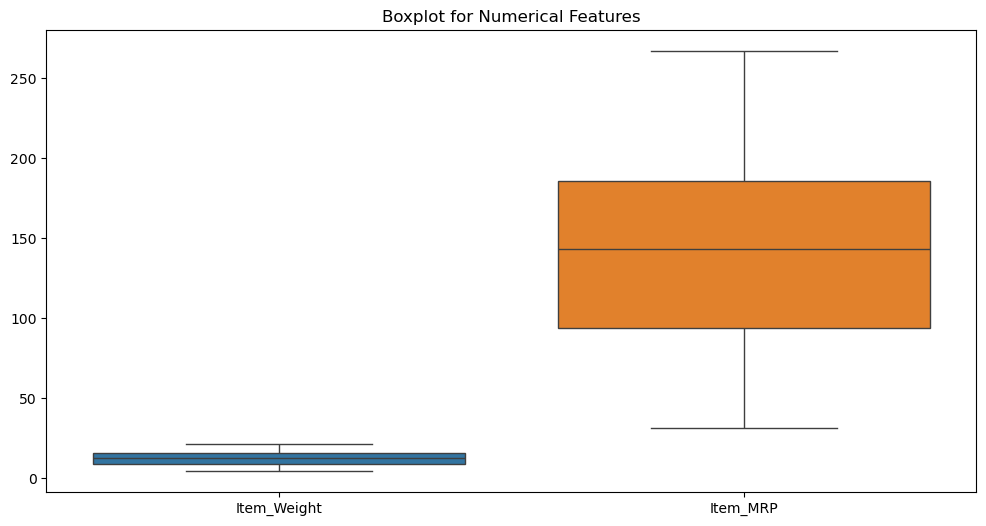

In [25]:
# Box plot to check outliers in numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Item_Weight', 'Item_MRP']], flierprops=dict(marker='D', color='red', markersize=8))
plt.title('Boxplot for Numerical Features')
plt.show()

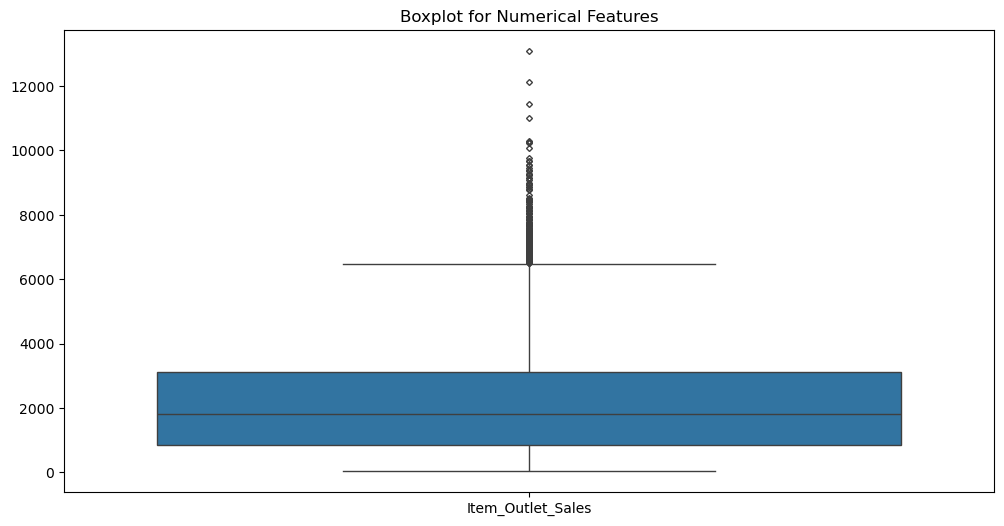

In [27]:
# Box plot to check outliers in numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Item_Outlet_Sales']], flierprops=dict(marker='D', color='red', markersize=3))
plt.title('Boxplot for Numerical Features')
plt.show()

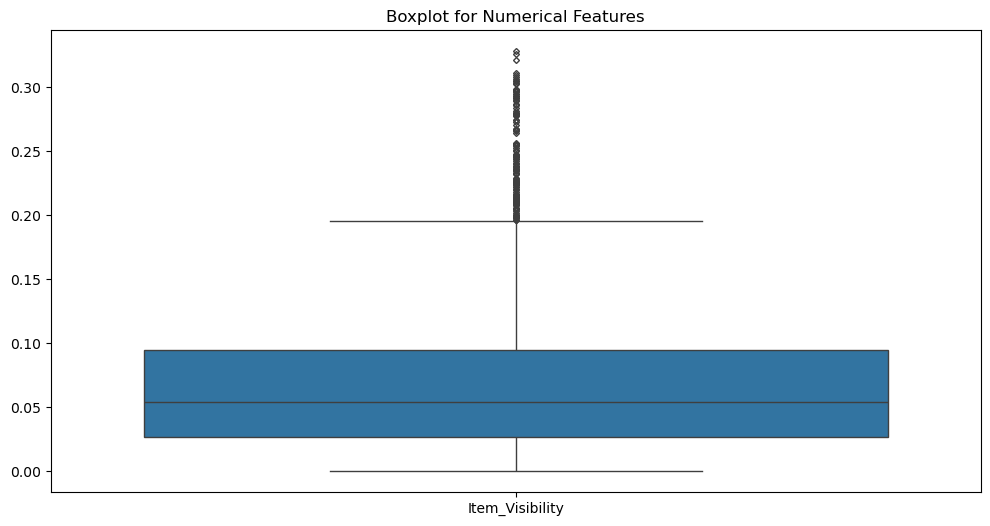

In [28]:
# Box plot to check outliers in numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Item_Visibility']],flierprops=dict(marker='D', color='red', markersize=3))
plt.title('Boxplot for Numerical Features')
plt.show()

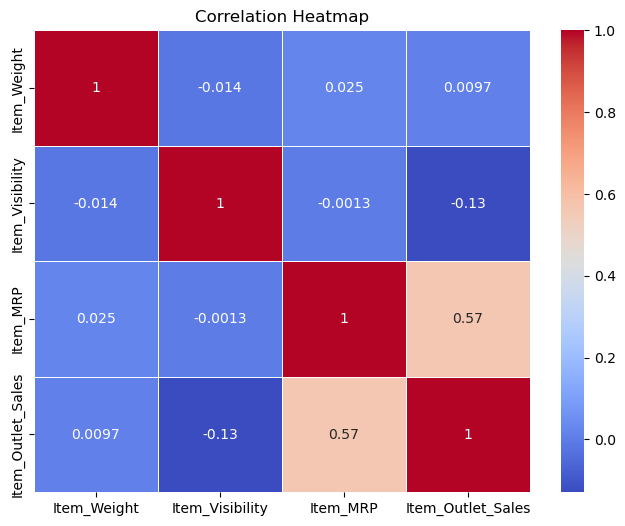

In [29]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
corr = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Here are the insights from the visualizations:

Distribution of Item_Outlet_Sales:

The target variable has a right-skewed distribution, indicating that most items have lower sales, with a few high-sale outliers.
This might suggest using a transformation like logarithmic scaling during model training.
Missing Values Heatmap:

As mentioned earlier, the main columns with missing data are Item_Weight and Outlet_Size, which have been temporarily filled for analysis.
Outliers (Boxplot):

Item_Visibility: There are extreme outliers, possibly erroneous values (e.g., visibility being 0 for some items).
Item_Outlet_Sales: There are a few significant outliers, but they represent high sales items, which may hold valuable information for the model.
Correlation Heatmap:

Item_MRP shows a strong positive correlation with Item_Outlet_Sales (~0.57), indicating that higher-priced items tend to have higher sales.
Item_Visibility has a slight negative correlation with Item_Outlet_Sales, which might suggest that more visible items do not necessarily sell more, but further investigation is needed.


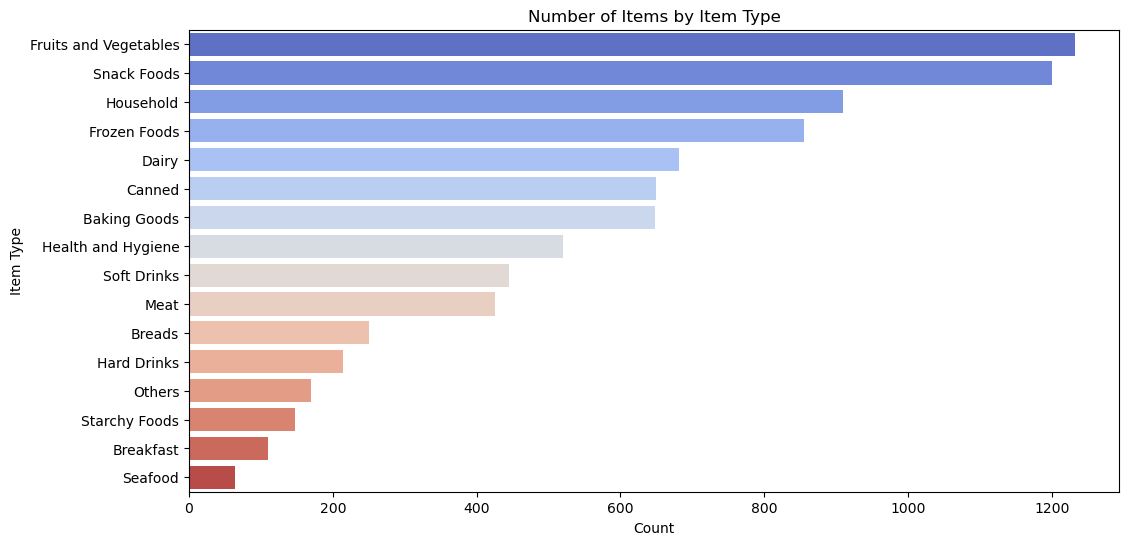

In [30]:
# Plot 1: Number of items of a particular Item_Type
plt.figure(figsize=(12, 6))
sns.countplot(y='Item_Type', data=df, order=df['Item_Type'].value_counts().index, palette="coolwarm")
plt.title('Number of Items by Item Type')
plt.xlabel('Count')
plt.ylabel('Item Type')
plt.show()

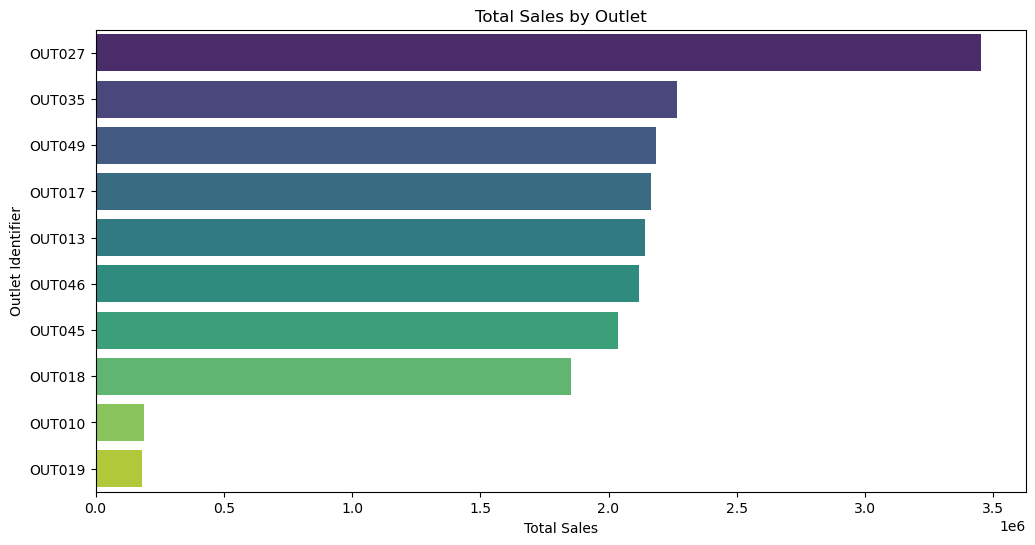

In [31]:
# Plot 2: Sales of the Outlet
plt.figure(figsize=(12, 6))
outlet_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=outlet_sales.values, y=outlet_sales.index, palette="viridis")
plt.title('Total Sales by Outlet')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Identifier')
plt.show()

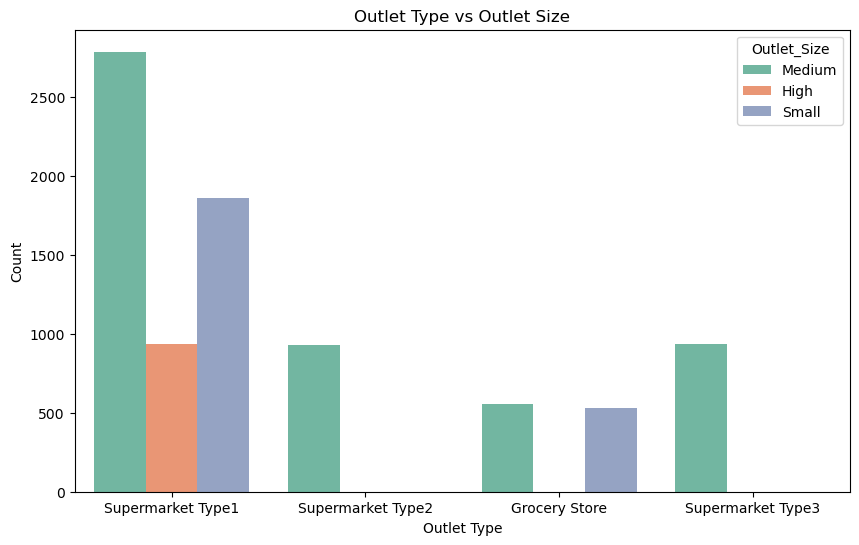

In [32]:
# Plot 3: Outlet Type vs Outlet Size
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Type', hue='Outlet_Size', data=df, palette="Set2")
plt.title('Outlet Type vs Outlet Size')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.show()

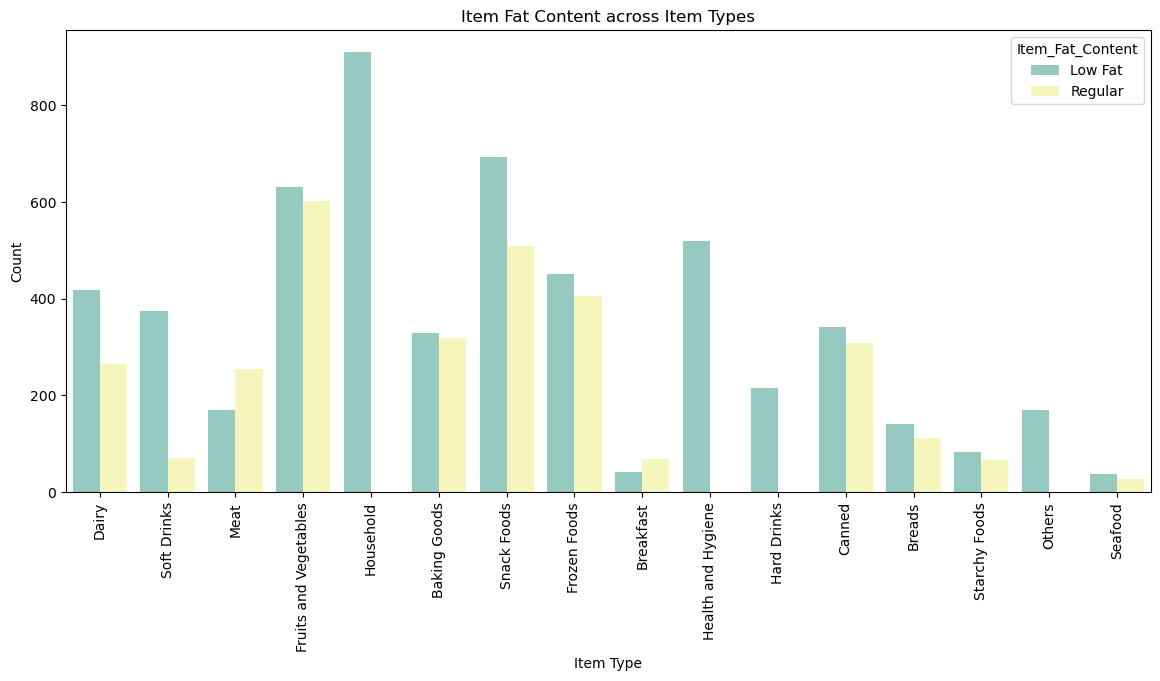

In [33]:
# Plot 4: Item_Fat_Content vs Item_Type
plt.figure(figsize=(14, 6))
sns.countplot(x='Item_Type', hue='Item_Fat_Content', data=df, palette="Set3")
plt.title('Item Fat Content across Item Types')
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.show()

In [34]:
outlet_years_sorted = df.groupby('Outlet_Identifier')['Outlet_Establishment_Year'].min().sort_values(ascending=True)
outlet_years_sorted.values

array([1985, 1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009],
      dtype=int64)

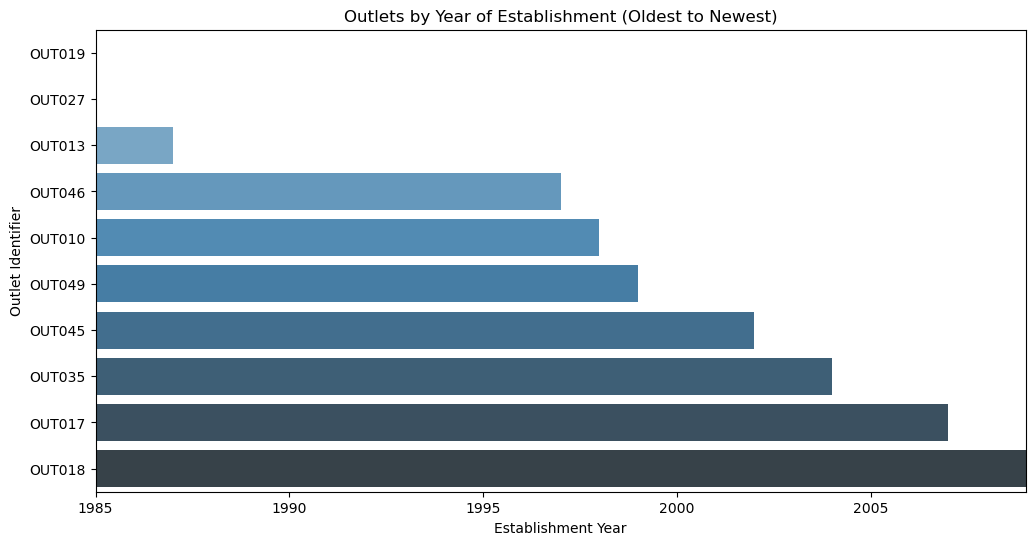

In [35]:
# Plot 5: Oldest Outlet by Establishment Year
plt.figure(figsize=(12, 6))
outlet_years_sorted = df.groupby('Outlet_Identifier')['Outlet_Establishment_Year'].min().sort_values(ascending=True)
sns.barplot(x=outlet_years_sorted.values, y=outlet_years_sorted.index, palette="Blues_d")
plt.xlim(outlet_years_sorted.min(), outlet_years_sorted.max())
plt.title('Outlets by Year of Establishment (Oldest to Newest)')
plt.xlabel('Establishment Year')
plt.ylabel('Outlet Identifier')
plt.show()



Here are the additional advanced visualizations and insights:

Number of Items by Item Type:

The most common item types are "Fruits and Vegetables" and "Snack Foods," suggesting these could be influential categories for predicting sales.
Total Sales by Outlet:

Some outlets have significantly higher total sales compared to others, which indicates potential for further investigation into why these outlets perform better (perhaps based on location, type, or size).
Outlet Type vs Outlet Size:

Most outlets of "Supermarket Type 1" are of medium size, while "Supermarket Type 3" has a higher proportion of small outlets. The distribution of outlet sizes across types could help in understanding their sales capacity.
Item Fat Content across Item Types:

Low-fat items dominate in almost every item type except for a few categories, such as "Snack Foods" and "Frozen Foods." This distribution can be useful for understanding consumer preferences in different categories.
Oldest Outlets by Establishment Year:

Outlets established in the 1980s and 1990s are still operational, and analyzing their long-term performance could offer insights into their enduring success.

### Conclusion of EDA:
- Data Quality: There were missing values in the Item_Weight and Outlet_Size columns. We filled them temporarily for analysis, but more advanced imputation techniques (such as using the median or predictive imputation) will be considered before modeling.

- Outliers: Significant outliers were found in Item_Visibility and Item_Outlet_Sales. These need careful handling (e.g., capping or transformation) to prevent skewing the model.

- Key Correlations:
    - Item_MRP showed a strong positive correlation with Item_Outlet_Sales, making it a critical feature for model prediction.
    - Item_Visibility had a slight negative correlation with sales, requiring more feature engineering or interaction terms for better understanding.
Sales and Outlet Analysis: Some outlets significantly outperformed others in sales. Outlet characteristics such as size, type, and age will likely be important factors in the model.

- Category Insights: Item types like "Fruits and Vegetables" and "Snack Foods" were among the most common, while "Low Fat" items dominated across categories. Consumer preferences related to these categories may influence sales predictions.

# DATA PREPROCESSING

In [36]:
df['Item_Category'] = df['Item_Identifier'].apply(lambda x: x[3:])
df["Item_Category"] = df["Item_Category"].astype("float")
df.drop(columns=["Outlet_Identifier", "Outlet_Establishment_Year", "Item_Identifier"] , inplace=True)

In [37]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,15.0
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,1.0
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,15.0
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,7.0
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,19.0
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,22.0
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,36.0
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,29.0
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,46.0


In [38]:
y=df['Item_MRP']
X=df.drop('Item_MRP',axis=1)

In [39]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [40]:
Item_Fat_Content_map=["Low Fat","Regular"]
Item_Type_map=["Fruits and Vegetables","Snack Foods","Household","Frozen Foods","Dairy","Canned","Baking Goods","Health and Hygiene",
           "Soft Drinks","Meat","Breads","Hard Drinks","Others","Starchy Foods","Breakfast","Seafood"]
Outlet_Size_map=["Medium","Small","High"]
Outlet_Location_Type_map=["Tier 3","Tier 2","Tier 1"]
Outlet_Type_map=["Supermarket Type1","Grocery Store","Supermarket Type3","Supermarket Type2"]

In [41]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
    
    
)

In [42]:
cat_pipeline=Pipeline(
    
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[Item_Fat_Content_map,Item_Type_map,Outlet_Size_map,Outlet_Location_Type_map,Outlet_Type_map]))
    ]
    
)

In [43]:
categorical_cols=X.select_dtypes(include='object').columns
categorical_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [44]:
numerical_cols=X.select_dtypes(include=['float', 'int']).columns
numerical_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Item_Category'], dtype='object')

In [45]:
len(numerical_cols) + len(categorical_cols)

9

In [46]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [47]:
import pickle
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump({'preprocessor': preprocessor}, f)

In [48]:
X.to_csv("data-without-label.csv")
y.to_csv("label.csv")